In [1]:
import pandas as pd

enriched_data = pd.read_csv('/Users/tamasmakos/dev/survey_methods_room/enriched_address.csv')

In [2]:
# Selecting the first row of the dataframe
test_address = enriched_data.iloc[1]

In [3]:
# Changing the settings to display all columns
pd.set_option('display.max_columns', None)

# Displaying the first row of the dataframe
enriched_data.head()


,id,town_ksh_code,province_name,town_name,town_type1,town_type2,town_type3,district_ksh_code,town_population,street_name,house_number,target,address,lon,lat,air_filling,animal_boarding,animal_breeding,animal_shelter,animal_training,archive,art_school,arts_centre,astronomical_observatory,atm,baby_hatch,baking_oven,bank,bank;arts_centre,bar,bbq,beauty,bell,bench,bicycle_parking,bicycle_rental,bicycle_repair_station,bicycle_trailer_sharing,biergarten,binoculars,bird_bath,boat_rental,boat_storage,border_control,brothel,btm,building_yard,bum,bureau_de_change,bus_station,bus_stop,cafe,cafe;pub,car_rental,car_sharing,car_wash,casino,cemetery,chair,charging_station,childcare,cinema,clinic,cloakroom,clock,college,community_centre,compressed_air,conference_centre,cooking_school,courthouse,coworking_space,crematorium,cultural_centre,culture_center,customs,dancing_school,dentist,detention_centre,device_charging_station,dive_centre,doctors,dog_toilet,dog_wash,dojo,dormitory,dressing_room,drinking_water,drinking_water;telephone,driving_school,escooter_rental,events_venue,fast_food,feeding_place,ferry_terminal,festival_grounds,fire_station,firehydrant,first_aid,fixme,food,food_court,fountain,fuel,funeral_hall,gambling,game_feeding,give_box,grave_yard,grit_bin,gym,health_facility,healthcare,hookah_lounge,hospital,hunting_blind,hunting_stand,ice_cream,ice_cream;cafe,internet_cafe,kindergarten,kindergarten Kunderbunt,kitchen,language_school,lavoir,letter_box,library,loading_dock,locker,lounger,luggage_locker,marketplace,migrant_detention_centre,mist_spraying_cooler,monastery,money_transfer,motorcycle_parking,motorcycle_rental,music_school,music_venue,nightclub,nursing_home,office,parcel_locker,parking,parking_entrance,parking_space,payment_centre,payment_terminal,pharmacy,photo_booth,piano,place_of_worship,planetarium,playhouse,police,post_box,post_depot,post_office,prep_school,printer,prison,product_pickup,pub,pub;cafe,pub;lottery,public_bath,public_bookcase,public_hall,ranger_station,reception,reception_desk,recycling,refugee_housing,rehearsal_studio,rental,restaurant,ritual_bath,sanitary_dump_station,school,shelter,shop,shower,ski_rental,ski_school,smoking_area,social_centre,social_facility,stage,stations,statue,stripclub,studio,table,taxi,telephone,theatre,ticket_validator,toilets,townhall,training,trolley_bay,university,vacuum_cleaner,vehicle_inspection,vehicle_ramp,vending_machine,vet_pharmacy,veterinary,veterinary_pharmacy,waste_basket,waste_disposal,waste_transfer_station,water_point,watering_place,weighbridge,winery,workshop,yes
0,1,27872,13,Abony,3,2,3,124,14916,attila utca,27,0,"attila utca 27, Abony",20.01463,47.19362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,27872,13,Abony,3,2,3,124,14916,bicskei út,4,1,"bicskei út 4, Abony",19.99496,47.18952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

Degree Centrality of the nearest node: 0.014319809069212411
Closeness Centrality of the nearest node: 0.07366385372714486
Betweenness Centrality of the nearest node: 0.030855326742663877
Eigenvector Centrality of the nearest node: 0.00010504034032022865
Clustering Coefficient of the nearest node: 0
PageRank of the nearest node: 0.0028979060875813627


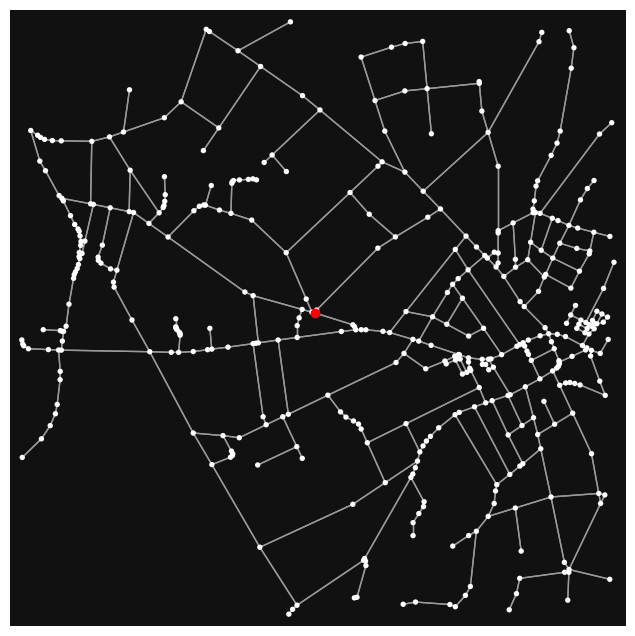

In [4]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

def road_network(lat, lon):
    # Requesting the road network data from OpenStreetMap
    G = ox.graph_from_point((lat, lon), dist=1000, network_type='walk', simplify=False)
    return G

# Replace with your actual latitude and longitude
G = road_network(test_address['lat'], test_address['lon'])

# Get the node closest to the original point
nearest_node = ox.distance.nearest_nodes(G, Y=test_address['lat'], X=test_address['lon'])

# Degree Centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality of the nearest node:", degree_centrality[nearest_node])

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality of the nearest node:", closeness_centrality[nearest_node])

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality of the nearest node:", betweenness_centrality[nearest_node])

# Eigenvector Centrality
G2 = nx.DiGraph(G)
eigen_centrality = nx.eigenvector_centrality(G2, max_iter=1000)
print("Eigenvector Centrality of the nearest node:", eigen_centrality[nearest_node])

# Clustering Coefficient
clustering_coefficient = nx.clustering(G2)
print("Clustering Coefficient of the nearest node:", clustering_coefficient[nearest_node])

# PageRank
pagerank = nx.pagerank(G)
print("PageRank of the nearest node:", pagerank[nearest_node])

# Plot the graph
fig, ax = ox.plot_graph(G, show=False, close=False)
ax.scatter(G.nodes[nearest_node]['x'], G.nodes[nearest_node]['y'], c='red')
plt.show()


In [5]:
stats = ox.basic_stats(G, clean_int_tol=15)
stats

/opt/homebrew/lib/python3.11/site-packages/osmnx/simplification.py:459: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = utils_graph.graph_to_gdfs(G, edges=False)["geometry"].buffer(tolerance).unary_union
/opt/homebrew/lib/python3.11/site-packages/osmnx/simplification.py:438: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return _merge_nodes_geometric(G, tolerance).centroid


{'n': 420,
 'm': 976,
 'k_avg': 4.647619047619048,
 'edge_length_total': 65632.22199999994,
 'edge_length_avg': 67.24612909836058,
 'streets_per_node_avg': 2.4,
 'streets_per_node_counts': {0: 0, 1: 22, 2: 221, 3: 164, 4: 13},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.05238095238095238,
  2: 0.5261904761904762,
  3: 0.3904761904761905,
  4: 0.030952380952380953},
 'intersection_count': 398,
 'street_length_total': 32816.11100000002,
 'street_segment_count': 488,
 'street_length_avg': 67.2461290983607,
 'circuity_avg': 1.0000000908984235,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 1}

In [6]:
# circuity_avg - see circuity_avg function documentation
# clean_intersection_count - see clean_intersection_count function documentation
# clean_intersection_density_km - clean_intersection_count per sq km
# edge_density_km - edge_length_total per sq km
# edge_length_avg - edge_length_total / m
# edge_length_total - see edge_length_total function documentation
# intersection_count - see intersection_count function documentation
# intersection_density_km - intersection_count per sq km
# k_avg - graph’s average node degree (in-degree and out-degree)
# m - count of edges in graph
# n - count of nodes in graph
# node_density_km - n per sq km
# self_loop_proportion - see self_loop_proportion function documentation
# street_density_km - street_length_total per sq km
# street_length_avg - street_length_total / street_segment_count
# street_length_total - see street_length_total function documentation
# street_segment_count - see street_segment_count function documentation
# streets_per_node_avg - see streets_per_node_avg function documentation
# streets_per_node_counts - see streets_per_node_counts function documentation
# streets_per_node_proportions - see streets_per_node_proportions function documentation

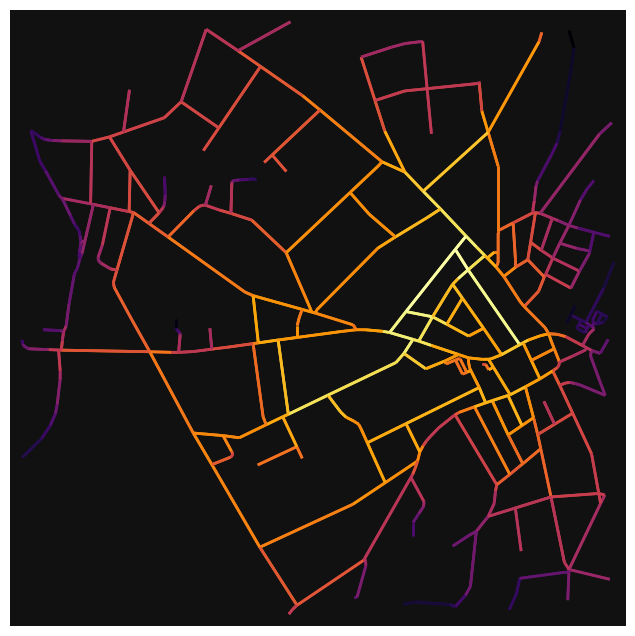

In [7]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, 'edge_centrality')

ec = ox.plot.get_edge_colors_by_attr(G, 'edge_centrality', cmap='inferno')
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)
# Adding the test address to the plot
ax.scatter(test_address['lon'], test_address['lat'], c='red', s=100)

plt.show()


In [37]:
import pandas as pd
import osmnx as ox
import networkx as nx

def append_network_stats(df, lat_col, lon_col, dist=1000):
    # Initialize dataframes to hold the new data
    data = pd.DataFrame()

    # Requesting the road network data from OpenStreetMap for each row in the dataframe
    for index, row in df.iterrows():
        lat = row[lat_col]
        lon = row[lon_col]

        try:
            G = ox.graph_from_point((lat, lon), dist=dist, network_type='walk')
        except ValueError as e:
            print(f'Could not retrieve network data for latitude {lat}, longitude {lon}: {e}')
            continue

        try:
            nearest_node = ox.distance.nearest_nodes(G, Y=lat, X=lon)
        except:
            print(f'Could not find nearest node for latitude {lat}, longitude {lon}')
            continue

        degree_centrality = nx.degree_centrality(G)
        closeness_centrality = nx.closeness_centrality(G)
        betweenness_centrality = nx.betweenness_centrality(G)
        G2 = nx.DiGraph(G)
        eigen_centrality = nx.eigenvector_centrality(G2, max_iter=5000) # Increase max_iter to 5000
        clustering_coefficient = nx.clustering(G2)
        pagerank = nx.pagerank(G)

        data_row = {}
        data_row['G'] = G
        data_row['G2'] = G2
        data_row['degree_centrality'] = degree_centrality.get(nearest_node, 0)
        data_row['closeness_centrality'] = closeness_centrality.get(nearest_node, 0)
        data_row['betweenness_centrality'] = betweenness_centrality.get(nearest_node, 0)
        data_row['eigenvector_centrality'] = eigen_centrality.get(nearest_node, 0)
        data_row['clustering_coefficient'] = clustering_coefficient.get(nearest_node, 0)
        data_row['pagerank'] = pagerank.get(nearest_node, 0)

        try:
            stats = ox.basic_stats(G, clean_int_tol=15)
        except:
            print(f'Could not compute basic stats for latitude {lat}, longitude {lon}')
            continue

        for key in stats.keys():
            data_row[key] = stats.get(key, 0)

        data = data.append(data_row, ignore_index=True)

    # Merge the dataframes
    merged_df = pd.concat([df, data], axis=1)

    return merged_df

# Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

connectivity_enriched_data = append_network_stats(enriched_data, 'lat', 'lon')


In [39]:
# Saving the data
connectivity_enriched_data.to_csv('connectivity_enriched_data.csv', index=False)

In [13]:
import pandas as pd
import osmnx as ox
import networkx as nx

def append_network(df, lat_col, lon_col, dist=1000):
    # Initialize dataframes to hold the new data
    data = pd.DataFrame()

    # Requesting the road network data from OpenStreetMap for each row in the dataframe
    for index, row in df.iterrows():
        lat = row[lat_col]
        lon = row[lon_col]

        try:
            G = ox.graph_from_point((lat, lon), dist=dist, network_type='walk')
        except ValueError as e:
            print(f'Could not retrieve network data for latitude {lat}, longitude {lon}: {e}')
            continue

        try:
            nearest_node = ox.distance.nearest_nodes(G, Y=lat, X=lon)
        except:
            print(f'Could not find nearest node for latitude {lat}, longitude {lon}')
            continue

        data_row = {}
        data_row['G'] = G
        data_row['G2'] = G2

    data = data.append(data_row, ignore_index=True)

    # Merge the dataframes
    merged_df = pd.concat([df, data], axis=1)

    return merged_df

# Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

network_enriched_data = append_network(enriched_data.head(100), 'lat', 'lon')


In [ ]:
network_enriched_data.to_csv('network_enriched_data.csv', index=False)

In [14]:
network_enriched_data.head()

,id,town_ksh_code,province_name,town_name,town_type1,town_type2,town_type3,district_ksh_code,town_population,street_name,house_number,target,address,lon,lat,air_filling,animal_boarding,animal_breeding,animal_shelter,animal_training,archive,art_school,arts_centre,astronomical_observatory,atm,baby_hatch,baking_oven,bank,bank;arts_centre,bar,bbq,beauty,bell,bench,bicycle_parking,bicycle_rental,bicycle_repair_station,bicycle_trailer_sharing,biergarten,binoculars,bird_bath,boat_rental,boat_storage,border_control,brothel,btm,building_yard,bum,bureau_de_change,bus_station,bus_stop,cafe,cafe;pub,car_rental,car_sharing,car_wash,casino,cemetery,chair,charging_station,childcare,cinema,clinic,cloakroom,clock,college,community_centre,compressed_air,conference_centre,cooking_school,courthouse,coworking_space,crematorium,cultural_centre,culture_center,customs,dancing_school,dentist,detention_centre,device_charging_station,dive_centre,doctors,dog_toilet,dog_wash,dojo,dormitory,dressing_room,drinking_water,drinking_water;telephone,driving_school,escooter_rental,events_venue,fast_food,feeding_place,ferry_terminal,festival_grounds,fire_station,firehydrant,first_aid,fixme,food,food_court,fountain,fuel,funeral_hall,gambling,game_feeding,give_box,grave_yard,grit_bin,gym,health_facility,healthcare,hookah_lounge,hospital,hunting_blind,hunting_stand,ice_cream,ice_cream;cafe,internet_cafe,kindergarten,kindergarten Kunderbunt,kitchen,language_school,lavoir,letter_box,library,loading_dock,locker,lounger,luggage_locker,marketplace,migrant_detention_centre,mist_spraying_cooler,monastery,money_transfer,motorcycle_parking,motorcycle_rental,music_school,music_venue,nightclub,nursing_home,office,parcel_locker,parking,parking_entrance,parking_space,payment_centre,payment_terminal,pharmacy,photo_booth,piano,place_of_worship,planetarium,playhouse,police,post_box,post_depot,post_office,prep_school,printer,prison,product_pickup,pub,pub;cafe,pub;lottery,public_bath,public_bookcase,public_hall,ranger_station,reception,reception_desk,recycling,refugee_housing,rehearsal_studio,rental,restaurant,ritual_bath,sanitary_dump_station,school,shelter,shop,shower,ski_rental,ski_school,smoking_area,social_centre,social_facility,stage,stations,statue,stripclub,studio,table,taxi,telephone,theatre,ticket_validator,toilets,townhall,training,trolley_bay,university,vacuum_cleaner,vehicle_inspection,vehicle_ramp,vending_machine,vet_pharmacy,veterinary,veterinary_pharmacy,waste_basket,waste_disposal,waste_transfer_station,water_point,watering_place,weighbridge,winery,workshop,yes,G,G2
0,1,27872,13,Abony,3,2,3,124,14916,attila utca,27,0,"attila utca 27, Abony",20.01463,47.19362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(248554623, 248555609, 255313223, 255313225, 3...","(265335966, 265338486, 265338487, 265338488, 2..."
1,2,27872,13,Abony,3,2,3,124,14916,bicskei út,4,1,"bicskei út 4, Abony",19.99496,47.18952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0

In [22]:
import json
import networkx as nx
from shapely.geometry import mapping

G = network_enriched_data[['target', 'G', 'G2']].iloc[0]['G']
G_dict = nx.to_dict_of_dicts(G)

# Convert LineString objects to dicts
for node in G_dict:
    for neighbor in G_dict[node]:
        if 'geometry' in G_dict[node][neighbor]:
            G_dict[node][neighbor]['geometry'] = mapping(G_dict[node][neighbor]['geometry'])

G_str = json.dumps(G_dict, default=str)
print(G_str)


{"248554623": {"6448495916": {"0": {"osmid": 108220566, "lanes": "2", "name": "\u00c1chim Andr\u00e1s utca", "highway": "residential", "maxspeed": "50", "oneway": false, "reversed": false, "length": 6.551}}, "6448495924": {"0": {"osmid": 749098393, "lanes": "2", "ref": "22", "name": "R\u00e1k\u00f3czi fejedelem \u00fatja", "highway": "primary", "maxspeed": "50", "oneway": false, "reversed": false, "length": 4.928}}, "9643937690": {"0": {"osmid": 749098393, "lanes": "2", "ref": "22", "name": "R\u00e1k\u00f3czi fejedelem \u00fatja", "highway": "primary", "maxspeed": "50", "oneway": false, "reversed": true, "length": 74.559}}}, "248555609": {"6719979520": {"0": {"osmid": 23039162, "oneway": false, "name": "Zichy utca", "highway": "residential", "maxspeed": "30", "reversed": false, "length": 9.39}}, "6719969615": {"0": {"osmid": 422842479, "lanes": "2", "name": "R\u00e1k\u00f3czi fejedelem \u00fatja", "highway": "residential", "maxspeed": "30", "oneway": false, "reversed": true, "length": 

In [ ]:
#14:17
#20:23
#16:19